# Allgemein

- Common Voice 50h
- Datum 2025-07-28  
- Datensatz: `merged_features_wer_tiny_50.csv`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CSV laden
df = pd.read_csv("../../results/subset_50h/merged_features_wer_tiny_50.csv")
df.head(5)

,filename,filepath,rms,log_energy,clipping_ratio,crest_factor,snr,hnr,f0,phoneme_entropy,...,mfcc_stat_85,mfcc_stat_86,mfcc_stat_87,mfcc_stat_88,mfcc_stat_89,mfcc_stat_90,mfcc_stat_91,reference,hypothesis,wer
0,common_voice_en_19226640.mp3,audio_files/common_voice_subset_50h/common_voi...,0.138755,7.460141,0.000044,7.206935,32.660785,23.016971,100.887721,5.278837,...,-0.727515,0.250416,-0.407458,-0.222167,-0.733382,-0.374494,-1.044447,Poor maintenance has often exacerbated these p...,Port maintenance has often exacerbated these p...,0.142857
1,common_voice_en_21783394.mp3,audio_files/common_voice_subset_50h/common_voi...,0.112247,6.645447,0.000033,8.908895,70.466809,22.516427,170.403942,NaN,...,-0.718962,-0.918190,-0.804865,-0.316269,-1.033074,1.359872,-0.074727,The comics were aimed at an older audience.,The comics were aimed at an older audience.,0.000000
2,common_voice_en_15904858.mp3,audio_files/common_voice_subset_50h/common_voi...,0.107539,7.020273,0.000052,9.298929,30.196857,19.716165,135.333079,5.394557,...,-0.979932,0.090703,0.533803,-0.315580,0.121224,0.145466,-0.263237,"Natalie gave me a pleasing massage, when we we...",Natalie gave me a pleasing massage when we wer...,0.000000
3,common_voice_en_23830464.mp3,audio_files/common_voice_subset_50h/common_voi...,0.111006,7.192654,0.000065,9.008530,21.029661,18.278107,182.299178,5.082705,...,0.288447,2.098648,-0.113770,0.202279,1.172325,-0.161524,0.262600,Joel is currently performing with The Joel Han...,Joel is currently performing with the Joel Han...,0.111111
4,common_voice_en_23889383.mp3,audio_files/common_voice_subset_50h/common_voi...,0.131413,7.289988,0.000212,7.609585,2.103716,16.080009,203.626716,NaN,...,-0.939715,0.144800,0.467994,0.334807,0.557081,0.246998,-0.255028,FileMaker files are compatible between Mac and...,File Maker files are compatible between Mac an...,0.250000


## Überblick & Datenqualität

In [4]:
# Überblick
print(f"Form der Daten: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")

# Fehlende Werte
missing = df.isna().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("\nFehlende Werte:")
    print(missing)
else:
    print("\nKeine fehlenden Werte.")

# Unendliche Werte
infinite = df.isin([np.inf, -np.inf]).sum()
infinite = infinite[infinite > 0]
if not infinite.empty:
    print("\nUnendliche Werte:")
    print(infinite)
else:
    print("\nKeine unendlichen Werte.")

Form der Daten: 25093 Zeilen, 126 Spalten

Fehlende Werte:
phoneme_entropy    1803
hypothesis            4
dtype: int64

Keine unendlichen Werte.


## Grundlegende Statistik

In [5]:
# Grundlegende Statistik
df_overview = df.drop(columns=[col for col in df.columns if col.startswith("mfcc_stat_") or col.startswith("chroma_")])
df_overview.describe().T

,count,mean,std,min,25%,50%,75%,max
rms,25093.0,0.121061,0.036670,0.018604,0.096219,0.117673,0.141019,0.405851
log_energy,25093.0,6.934627,0.727820,3.078422,6.475711,6.968568,7.419657,9.549782
clipping_ratio,25093.0,0.000083,0.000155,0.000004,0.000027,0.000051,0.000096,0.014275
crest_factor,25093.0,9.082791,3.112334,2.463958,7.091235,8.498135,10.392941,53.752045
snr,25093.0,34.363165,21.910190,-9.418887,22.466235,33.097055,44.022231,380.783768
hnr,25093.0,21.093248,5.576330,-2.101060,17.421017,21.150614,24.784688,43.111635
f0,25093.0,143.055365,48.682002,0.000000,109.688496,130.664948,178.364622,293.149947
phoneme_entropy,23290.0,5.528130,0.721112,1.486394,5.068584,5.533242,5.991948,8.708388
rt60_reverberation,25093.0,3.445910,1.697069,0.016875,2.260250,3.263875,4.383500,31.877125
spectral_bandwidth,25093.0,1584.830918,224.783149,411.360932,1444.432853,1590.288923,1734.190774,2507.378322


# WER

In [65]:
feature = "wer"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         0.213340
std          0.336221
min          0.000000
25%          0.000000
50%          0.125000
75%          0.300000
max         14.500000
Name: wer, dtype: float64


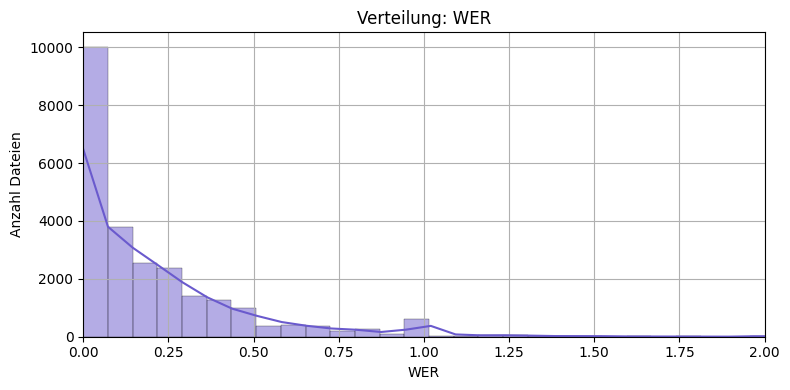

In [70]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature], bins=200, kde=True, color="slateblue")
plt.title("Verteilung: WER")
plt.xlabel("WER")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,2)
plt.grid(True)
plt.tight_layout()
plt.show()

# Einzelne Features

## 01 Chroma Features

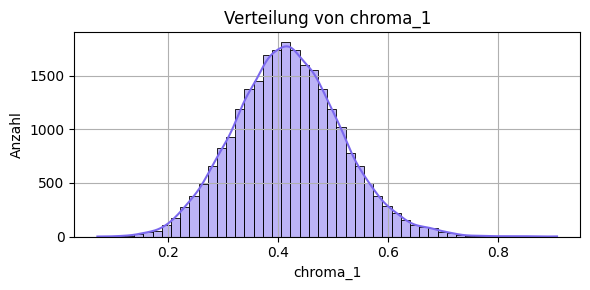

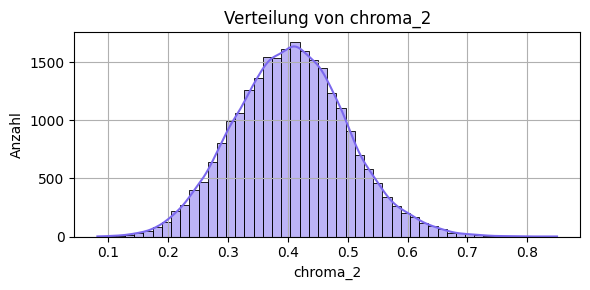

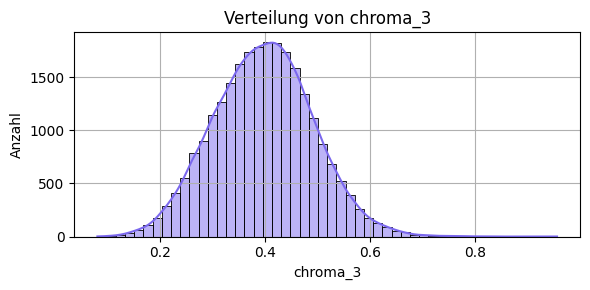

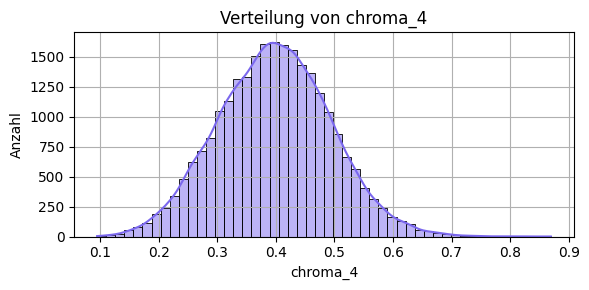

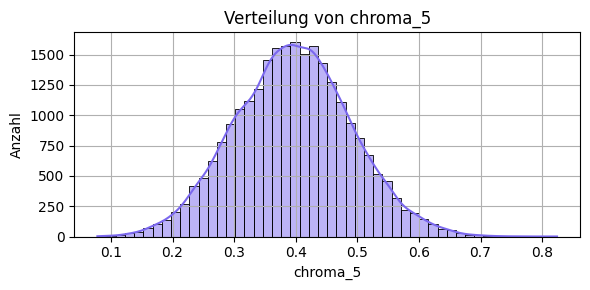

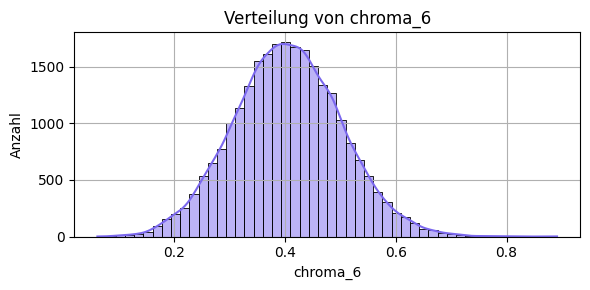

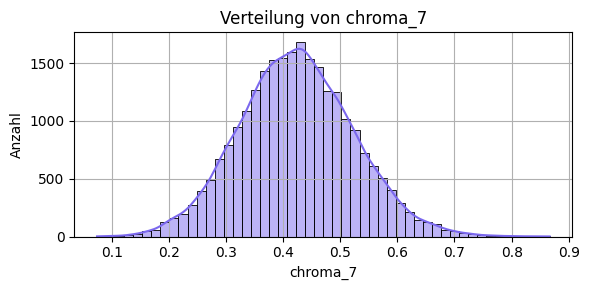

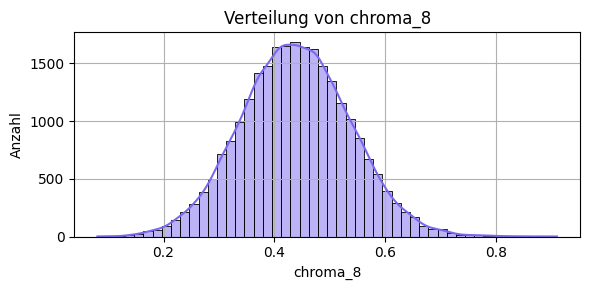

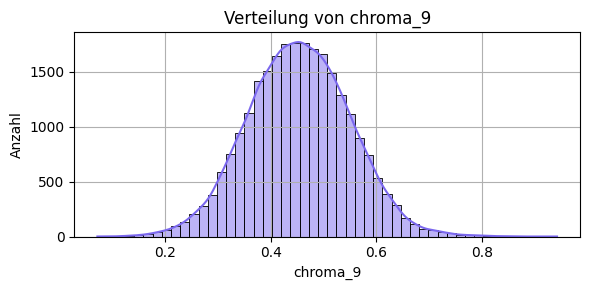

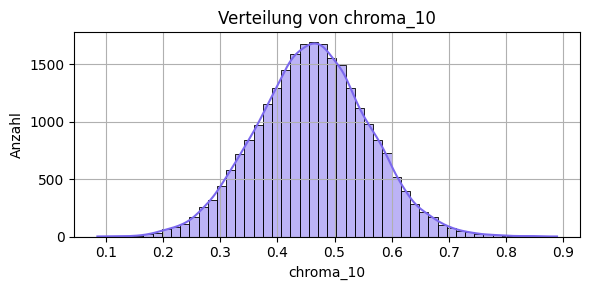

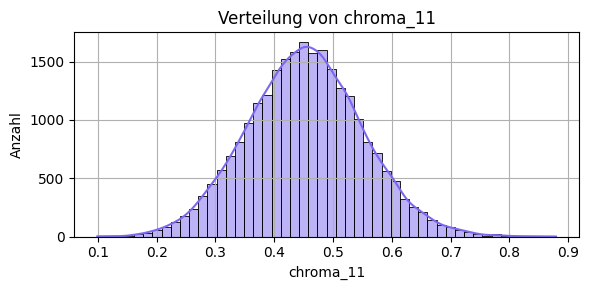

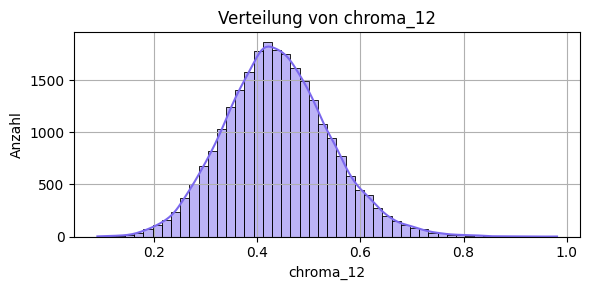

In [6]:
feature = "clipping_ratio"
chroma_cols = [f"chroma_{i}" for i in range(1, 13)]

for col in chroma_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=50, kde=True, color="mediumslateblue")
    plt.title(f"Verteilung von {col}")
    plt.xlabel(col)
    plt.ylabel("Anzahl")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
df[chroma_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
chroma_1,25093.0,0.418868,0.096925,0.072388,0.353047,0.416661,0.481161,0.907245
chroma_2,25093.0,0.405715,0.094078,0.082683,0.341145,0.405253,0.466919,0.849316
chroma_3,25093.0,0.397587,0.094013,0.081541,0.332846,0.398022,0.460501,0.955651
chroma_4,25093.0,0.397809,0.095637,0.094925,0.332011,0.397890,0.461976,0.869575
chroma_5,25093.0,0.396157,0.094278,0.078032,0.331941,0.395937,0.458811,0.824141
chroma_6,25093.0,0.405379,0.096800,0.062187,0.340069,0.403958,0.469998,0.890964
chroma_7,25093.0,0.423473,0.099609,0.074391,0.356526,0.421974,0.489228,0.866461
chroma_8,25093.0,0.438474,0.097959,0.080634,0.371683,0.437455,0.503872,0.909687
chroma_9,25093.0,0.453344,0.096272,0.070914,0.387321,0.452999,0.518344,0.942469
chroma_10,25093.0,0.461977,0.097780,0.085128,0.397059,0.461962,0.526331,0.889135


## 02 Clipping Ratio

In [8]:
feature = "clipping_ratio"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(f"Anzahl potenzieller Ausreißer in {feature}: {np.sum(df[feature] > (df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)) ))}")

df[feature].describe()

Fehlende Werte: 0
Anzahl potenzieller Ausreißer in clipping_ratio: 1944


count    25093.000000
mean         0.000083
std          0.000155
min          0.000004
25%          0.000027
50%          0.000051
75%          0.000096
max          0.014275
Name: clipping_ratio, dtype: float64

## 03 Crest Factor

In [9]:
feature = "crest_factor"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
df[feature].describe()

Fehlende Werte: 0


count    25093.000000
mean         9.082791
std          3.112334
min          2.463958
25%          7.091235
50%          8.498135
75%         10.392941
max         53.752045
Name: crest_factor, dtype: float64

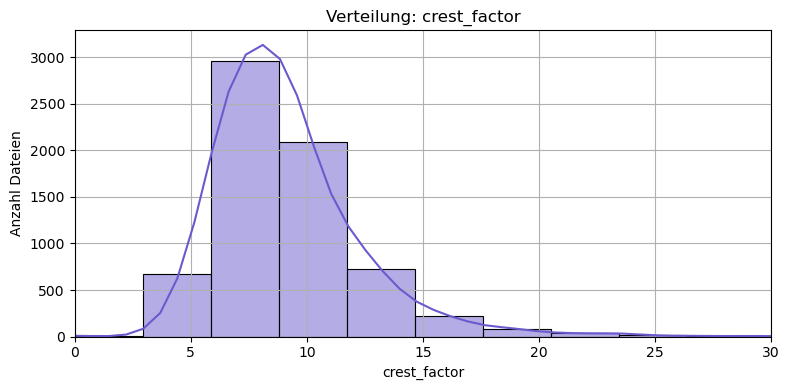

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature], bins=50, kde=True, color="slateblue")
plt.title("Verteilung: crest_factor")
plt.xlabel("crest_factor")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,30)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in f0: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in f0: 966
Minimum: 2.46
Maximum: 53.75


## 04 Fudamental Frequency (f0)

In [11]:
feature = "f0"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean       143.055365
std         48.682002
min          0.000000
25%        109.688496
50%        130.664948
75%        178.364622
max        293.149947
Name: f0, dtype: float64


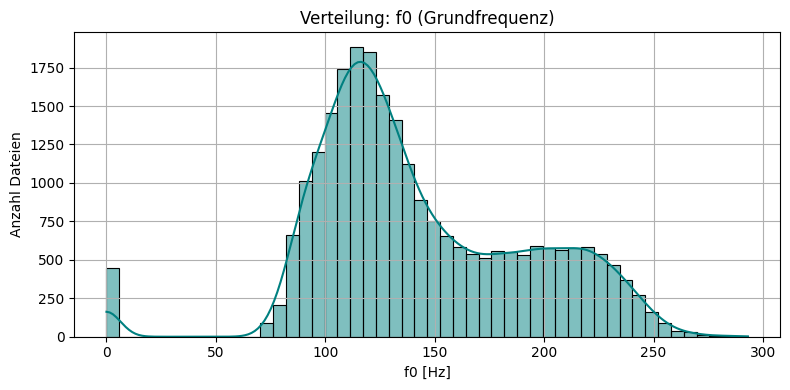

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=50, kde=True, color="teal")
plt.title("Verteilung: f0 (Grundfrequenz)")
plt.xlabel("f0 [Hz]")
plt.ylabel("Anzahl Dateien")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in f0: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in f0: 455
Minimum: 0.00
Maximum: 293.15


## 05 Harmonics-to-Noise Ratio (HNR)

In [14]:
feature = "hnr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean        21.093248
std          5.576330
min         -2.101060
25%         17.421017
50%         21.150614
75%         24.784688
max         43.111635
Name: hnr, dtype: float64


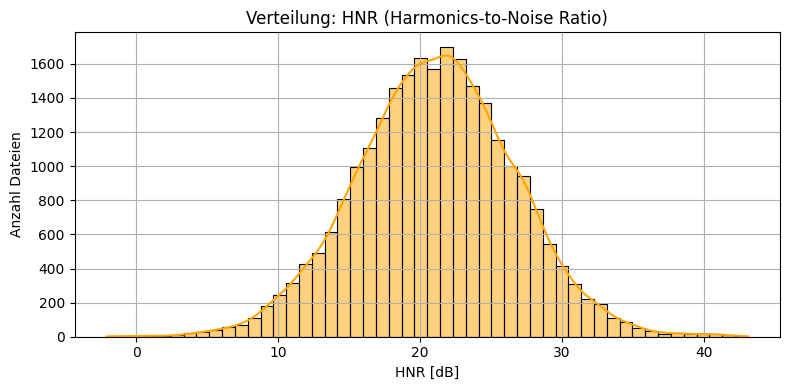

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=50, kde=True, color="orange")
plt.title("Verteilung: HNR (Harmonics-to-Noise Ratio)")
plt.xlabel("HNR [dB]")
plt.ylabel("Anzahl Dateien")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in hnr: 266
Minimum: -2.10
Maximum: 43.11


## 06 Log Energy

In [17]:
feature = "log_energy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         6.934627
std          0.727820
min          3.078422
25%          6.475711
50%          6.968568
75%          7.419657
max          9.549782
Name: log_energy, dtype: float64


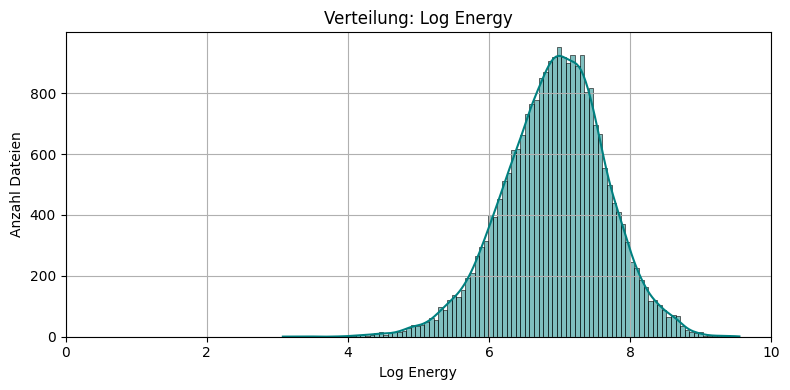

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=100, kde=True, color="teal")
plt.title("Verteilung: Log Energy")
plt.xlabel("Log Energy")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.4f}")
print(f"Maximum: {df[feature].max():.4f}")

Potenzielle Ausreißer in log_energy: 321
Minimum: 3.0784
Maximum: 9.5498


## 07 Loudness Range

In [20]:
feature = "loudness_range"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean        60.846077
std         26.746326
min          0.000000
25%         50.177720
50%         59.614817
75%         69.794807
max        505.862970
Name: loudness_range, dtype: float64


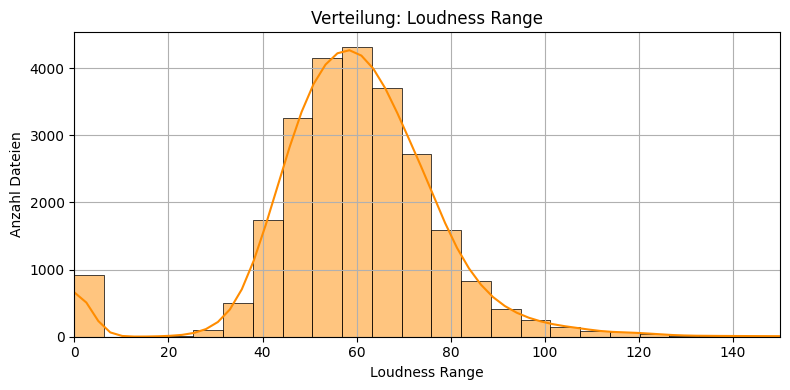

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=80, kde=True, color="darkorange")
plt.title("Verteilung: Loudness Range")
plt.xlabel("Loudness Range")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,150)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.4f}")
print(f"Maximum: {df[feature].max():.4f}")

Potenzielle Ausreißer in loudness_range: 1567
Minimum: 0.0000
Maximum: 505.8630


## 08 MFCC

In [23]:
mean_cols = [f"mfcc_stat_{i}" for i in range(1, 14)]
df[mean_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
mfcc_stat_1,25093.0,-290.342072,56.033753,-567.518000,-323.771150,-288.212980,-254.001360,13.995555
mfcc_stat_2,25093.0,79.031290,25.487847,-25.323090,61.833508,78.964745,95.878090,185.561570
mfcc_stat_3,25093.0,2.978169,18.172569,-87.057495,-8.831942,3.272503,15.113887,84.497850
mfcc_stat_4,25093.0,21.213466,14.587151,-46.986855,11.593393,21.311289,30.908450,91.642560
mfcc_stat_5,25093.0,-4.436396,12.656423,-62.329044,-12.698734,-4.144783,4.181731,45.394722
mfcc_stat_6,25093.0,-2.481412,10.595872,-65.266990,-9.302959,-1.983556,4.645726,43.052180
mfcc_stat_7,25093.0,-10.815850,9.768638,-51.736023,-17.132547,-10.510694,-4.127510,35.389202
mfcc_stat_8,25093.0,-5.597916,8.484453,-43.588737,-11.000869,-5.456410,0.064066,30.130053
mfcc_stat_9,25093.0,-7.764678,7.805623,-44.197685,-12.780575,-7.544342,-2.606843,26.148188
mfcc_stat_10,25093.0,-3.629290,6.719735,-31.805103,-7.977342,-3.468621,0.830210,27.668161


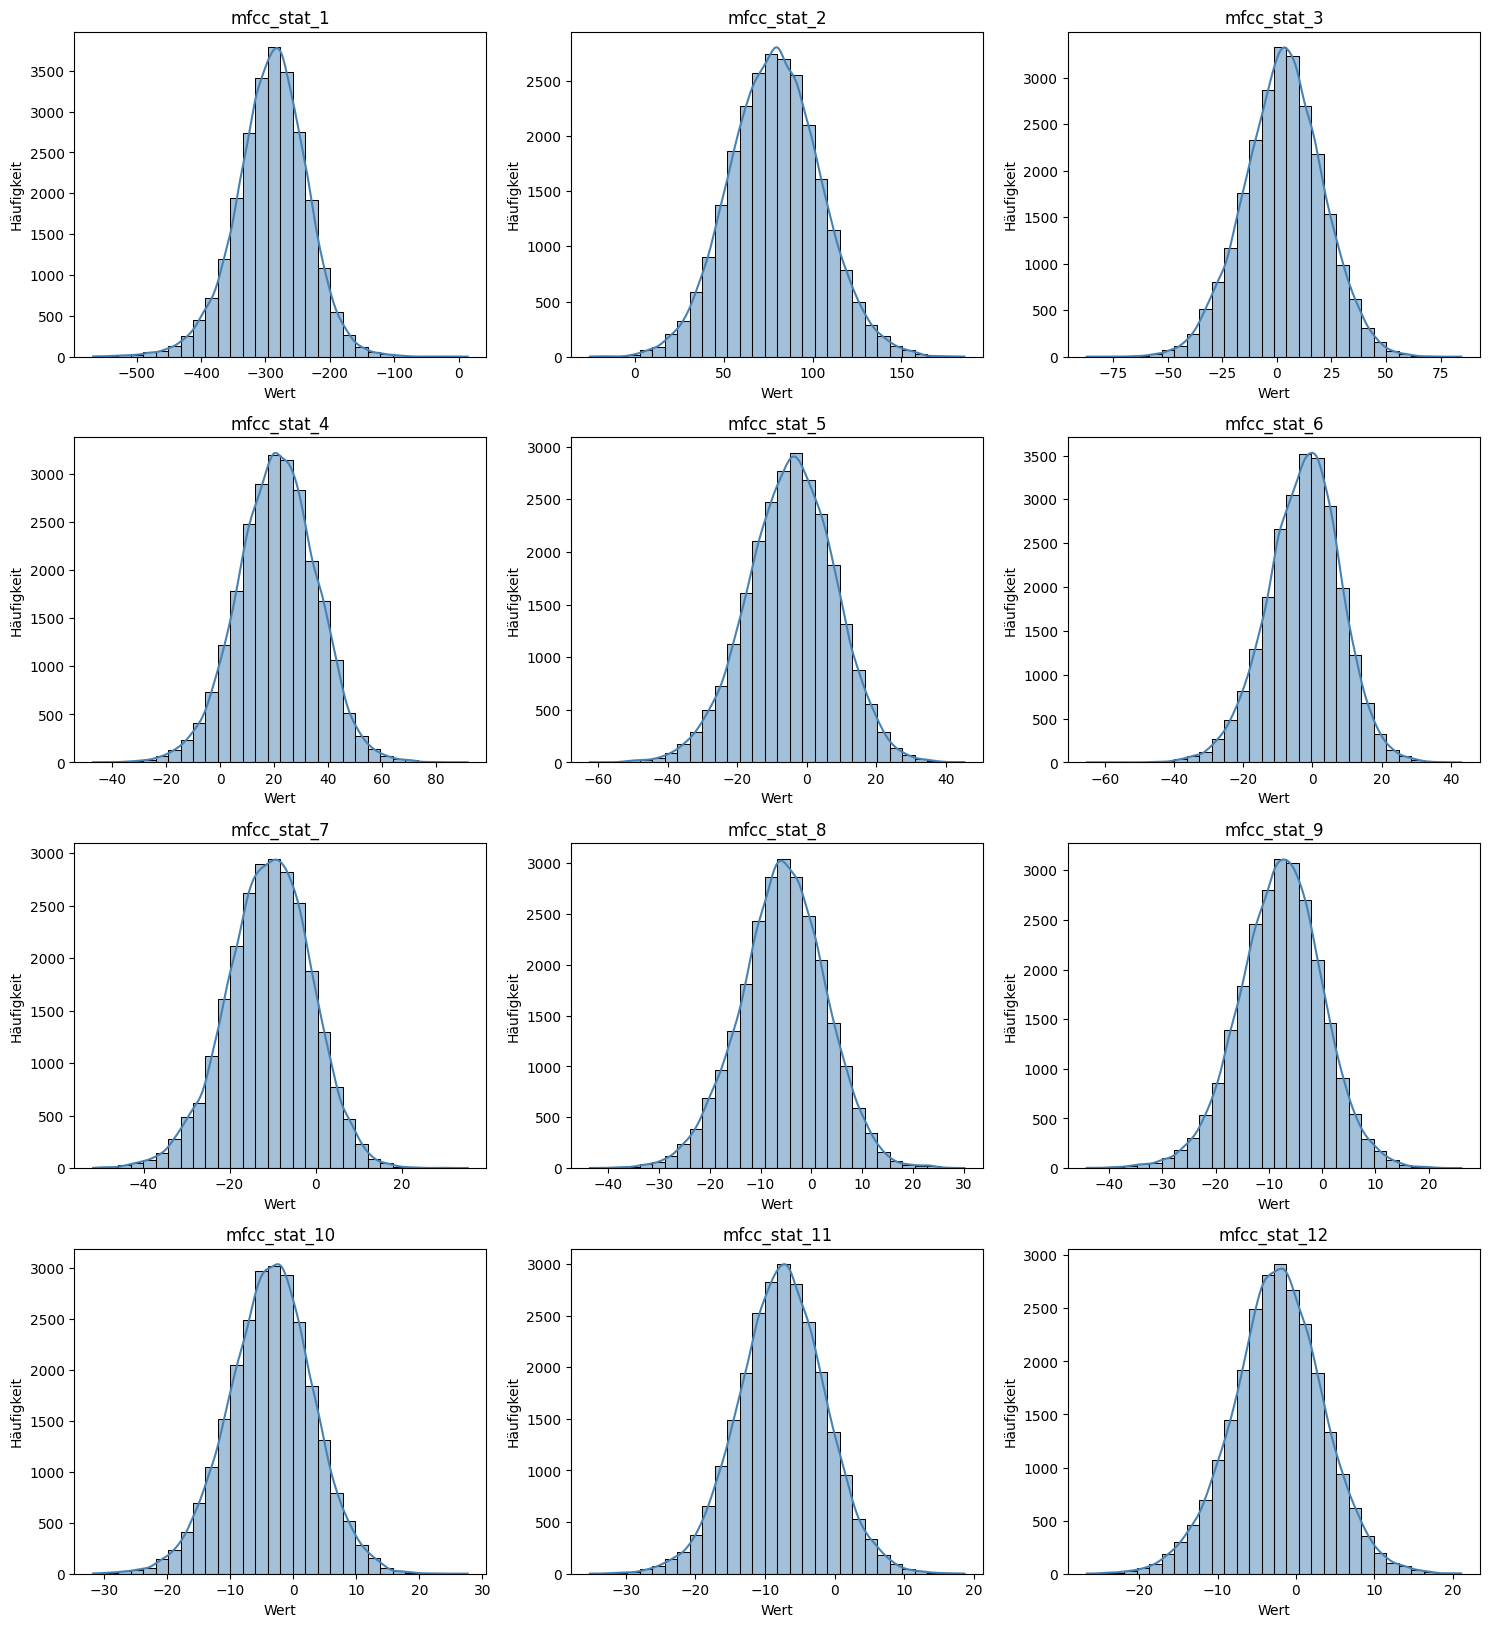

In [24]:
# Liste der ersten 13 MFCC-Mittelwerte
mfcc_mean_cols = [f"mfcc_stat_{i}" for i in range(1, 13)]

# Plots anlegen
plt.figure(figsize=(15, 20))
for i, col in enumerate(mfcc_mean_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="steelblue")
    plt.title(col)
    plt.xlabel("Wert")
    plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.show()

## 09 Phoneme Entropy

In [25]:
feature = "phoneme_entropy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 1803
count    23290.000000
mean         5.528130
std          0.721112
min          1.486394
25%          5.068584
50%          5.533242
75%          5.991948
max          8.708388
Name: phoneme_entropy, dtype: float64


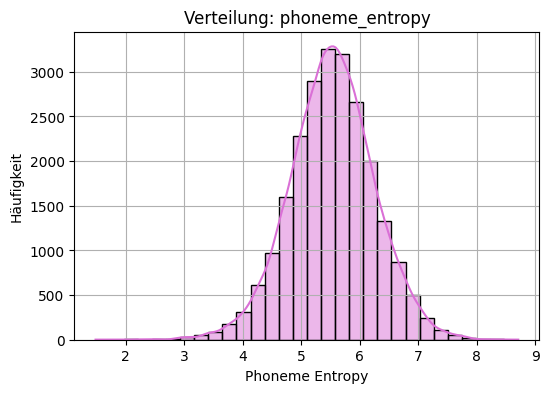

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="orchid")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Phoneme Entropy")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [27]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 345
Min/Max: 1.486394 8.708388


## 10 Reverberation

In [28]:
feature = "rt60_reverberation"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         3.445910
std          1.697069
min          0.016875
25%          2.260250
50%          3.263875
75%          4.383500
max         31.877125
Name: rt60_reverberation, dtype: float64


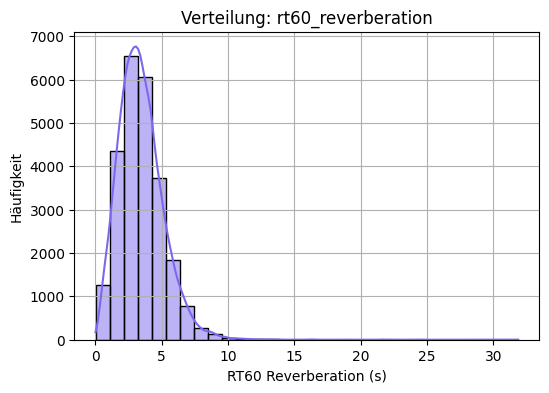

In [29]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="mediumslateblue")
plt.title(f"Verteilung: {feature}")
plt.xlabel("RT60 Reverberation (s)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [30]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 452
Min/Max: 0.0168749999999997 31.877125


## 11 RMS

In [31]:
feature = "rms"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         0.121061
std          0.036670
min          0.018604
25%          0.096219
50%          0.117673
75%          0.141019
max          0.405851
Name: rms, dtype: float64


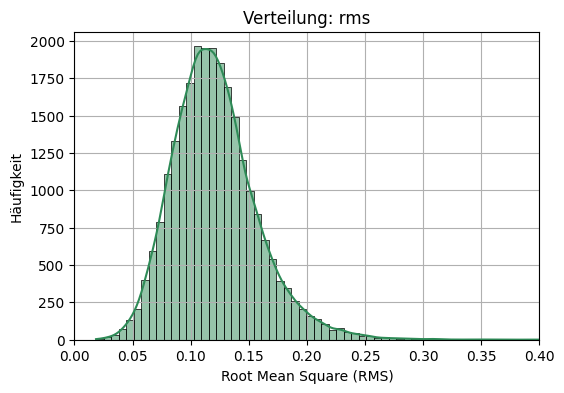

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=60, kde=True, color="seagreen")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Root Mean Square (RMS)")
plt.ylabel("Häufigkeit")
plt.xlim(0,0.4)
plt.grid(True)
plt.show()

In [33]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 571
Min/Max: 0.018603943 0.40585107


## 12 SNR

In [34]:
feature = "snr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean        34.363165
std         21.910190
min         -9.418887
25%         22.466235
50%         33.097055
75%         44.022231
max        380.783768
Name: snr, dtype: float64


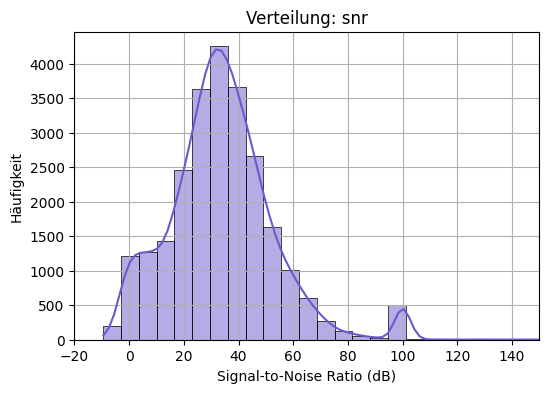

In [35]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=60, kde=True, color="slateblue")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Signal-to-Noise Ratio (dB)")
plt.ylabel("Häufigkeit")
plt.xlim(-20,150)
plt.grid(True)
plt.show()

In [36]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 735
Min/Max: -9.41888689994812 380.7837677001953


## 13 Spectral Bandwidth

In [37]:
feature = "spectral_bandwidth"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean      1584.830918
std        224.783149
min        411.360932
25%       1444.432853
50%       1590.288923
75%       1734.190774
max       2507.378322
Name: spectral_bandwidth, dtype: float64


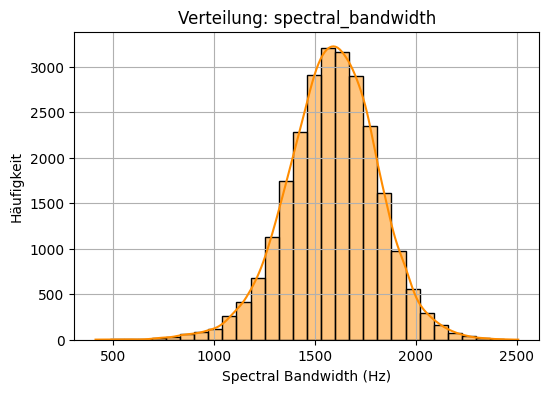

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="darkorange")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Spectral Bandwidth (Hz)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [39]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 395
Min/Max: 411.3609317048392 2507.378321712656


## 14 Spectral Centroid

In [40]:
feature = "spectral_centroid"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean      1881.909210
std        428.432039
min        352.914861
25%       1581.398176
50%       1860.143670
75%       2158.893642
max       3832.800793
Name: spectral_centroid, dtype: float64


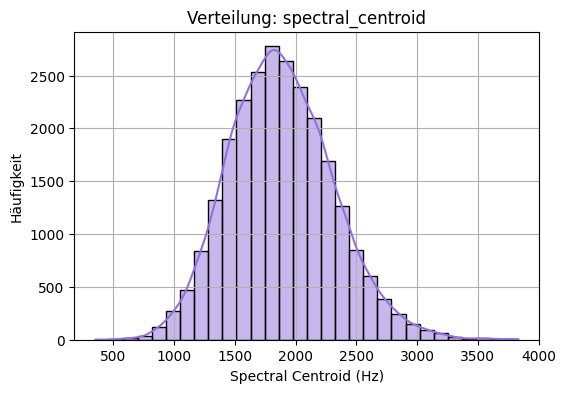

In [41]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="mediumpurple")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Spectral Centroid (Hz)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [42]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 236
Min/Max: 352.9148614564013 3832.80079262736


## 15 Spectral Contrast

In [43]:
# Feature-Name
feature = "spectral_contrast"

# 1. Umwandeln der Strings (ohne Kommas) zu Arrays
df[feature] = df[feature].apply(
    lambda x: np.fromstring(x.strip("[]"), sep=" ") if isinstance(x, str) else np.array(x)
)

# 2. Zu DataFrame umwandeln für separate Spalten
contrast_array = np.vstack(df[feature].values)
contrast_df = pd.DataFrame(contrast_array, columns=[f"{feature}_band{i+1}" for i in range(contrast_array.shape[1])])

# 3. Statistische Übersicht je Band
display(contrast_df.describe().T)



,count,mean,std,min,25%,50%,75%,max
spectral_contrast_band1,25093.0,20.301942,2.298311,12.039690,18.802821,20.286653,21.762324,35.188855
spectral_contrast_band2,25093.0,15.558451,1.772864,10.747644,14.301850,15.372267,16.602632,24.212116
spectral_contrast_band3,25093.0,18.399363,1.779210,12.606089,17.145334,18.322310,19.556616,27.583792
spectral_contrast_band4,25093.0,17.685395,1.639363,12.868074,16.537660,17.459916,18.598407,30.819808
spectral_contrast_band5,25093.0,18.726222,1.735488,13.826965,17.509119,18.529011,19.738096,29.554815
spectral_contrast_band6,25093.0,21.106958,3.085767,13.725012,19.116730,20.707848,22.607010,58.741211
spectral_contrast_band7,25093.0,52.962686,3.189667,22.663817,51.491134,52.922880,54.530711,66.552179


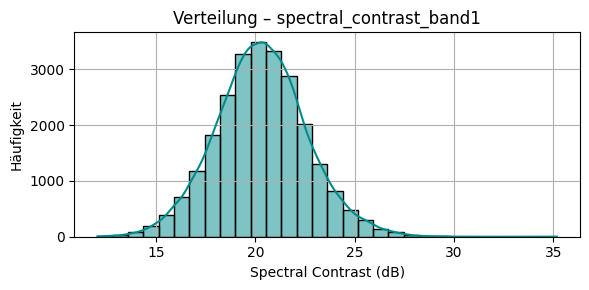

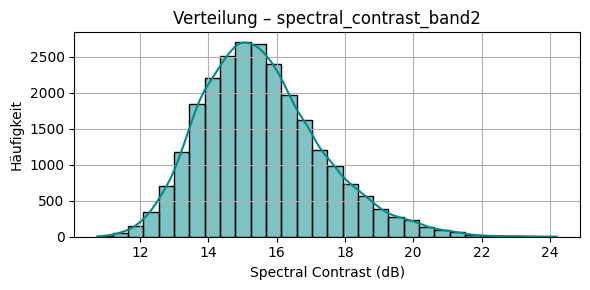

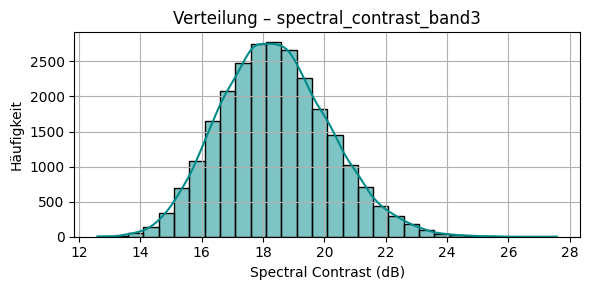

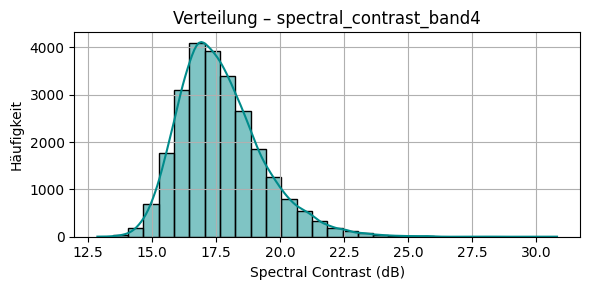

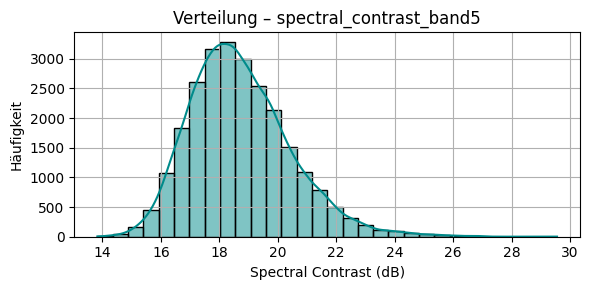

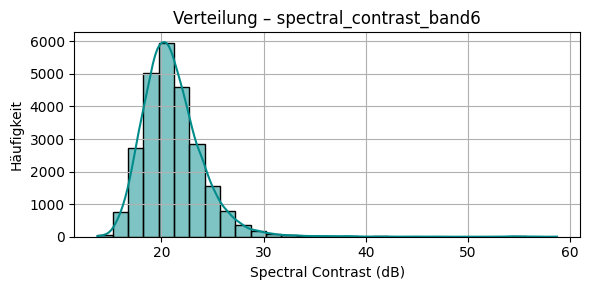

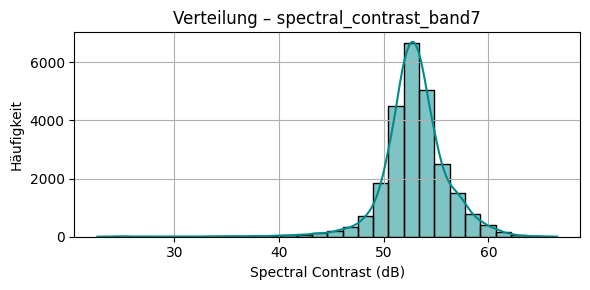

In [44]:
# 4. Histogramme pro Frequenzband
import matplotlib.pyplot as plt
import seaborn as sns

for col in contrast_df.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(contrast_df[col], bins=30, kde=True, color="#008B8B")
    plt.title(f"Verteilung – {col}")
    plt.xlabel("Spectral Contrast (dB)")
    plt.ylabel("Häufigkeit")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 16 Spectral Entropy

In [45]:
feature = "spectral_entropy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         3.262655
std          0.461714
min          0.948467
25%          2.969032
50%          3.266357
75%          3.559076
max          5.334503
Name: spectral_entropy, dtype: float64


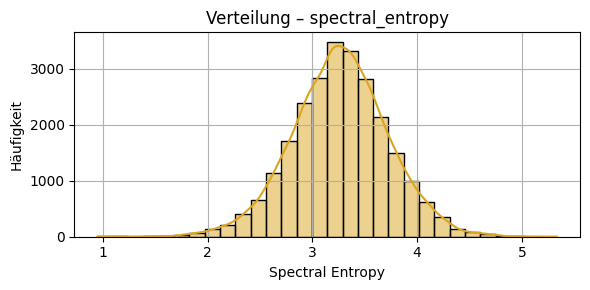

In [46]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#DAA520")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Entropy")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 382
Min/Max: 0.94846714 5.3345027


## 17 Spectral Flatness

In [48]:
feature = "spectral_flatness"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         0.047588
std          0.051877
min          0.000042
25%          0.019219
50%          0.032912
75%          0.056672
max          0.790461
Name: spectral_flatness, dtype: float64


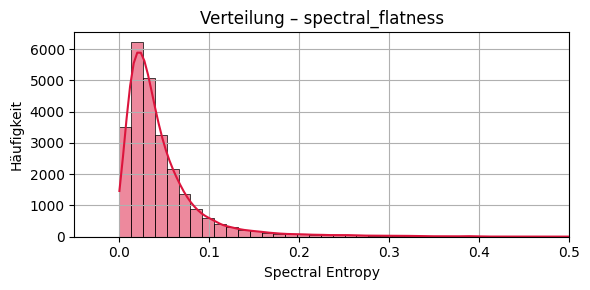

In [49]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=60, kde=True, color = "#DC143C")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Entropy")
plt.ylabel("Häufigkeit")
plt.xlim(-0.05,0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 1746
Min/Max: 4.159917e-05 0.7904607


## 18 Spectral Rolloff

In [51]:
feature = "spectral_rolloff"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean      3500.012421
std        738.019850
min        353.715551
25%       2998.677885
50%       3503.104305
75%       3993.201336
max       6512.728987
Name: spectral_rolloff, dtype: float64


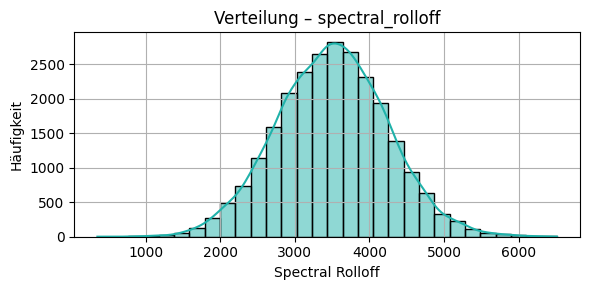

In [52]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#20B2AA")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Rolloff")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.05,0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 190
Min/Max: 353.71555118110234 6512.728987068966


## 19 Spectral Flatness

In [54]:
feature = "spectral_flatness"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         0.047588
std          0.051877
min          0.000042
25%          0.019219
50%          0.032912
75%          0.056672
max          0.790461
Name: spectral_flatness, dtype: float64


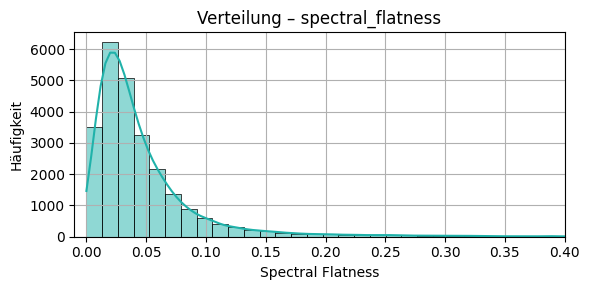

In [55]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=60, kde=True, color = "#20B2AA")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Flatness")
plt.ylabel("Häufigkeit")
plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 1746
Min/Max: 4.159917e-05 0.7904607


## 20 Voice Activity Detection (VAD)

In [57]:
feature = "vad"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean        48.064065
std         12.917560
min          1.123596
25%         40.163934
50%         48.888889
75%         56.617647
max        100.000000
Name: vad, dtype: float64


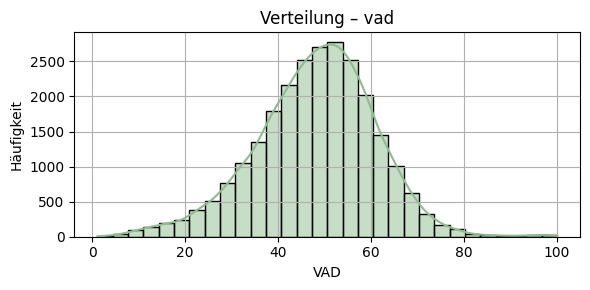

In [58]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#8FBC8F")
plt.title(f"Verteilung – {feature}")
plt.xlabel("VAD")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 470
Min/Max: 1.1235955056179776 100.0


## 21 Zero Crossing Rate (ZCR)

In [60]:
feature = "zcr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    25093.000000
mean         0.163080
std          0.054313
min          0.016268
25%          0.124562
50%          0.157913
75%          0.196854
max          0.439955
Name: zcr, dtype: float64


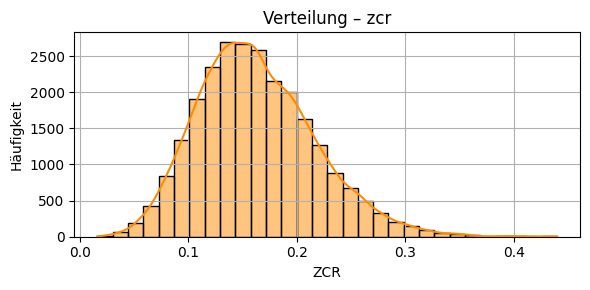

In [61]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#FF8C00")
plt.title(f"Verteilung – {feature}")
plt.xlabel("ZCR")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 94
Min/Max: 0.0 0.5307088
